In [2]:
!pip install PyPDF2

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install gensim
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Import Earnings Call downloaded from Factset.com and apply textual and sentiment analysis of earnings call for Airbnb

In [4]:
import os
import re
import PyPDF2
import nltk
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
# Download NLTK resources if you haven't done so
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/speeep/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/speeep/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/speeep/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/speeep/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
def extract_text_from_pdf(pdf_file_path):
    """Extracts text from a PDF file."""
    text = ""
    with open(pdf_file_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            extracted = page.extract_text()
            if extracted:
                text += extracted
    return text

def extract_from_all_pdfs_in_folder(folder_path):
    """Extracts text from all PDF files in the given folder."""
    pdf_texts = {}

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".pdf"):
            full_path = os.path.join(folder_path, filename)
            text = extract_text_from_pdf(full_path)
            pdf_texts[filename] = text
            print(f"✅ Extracted from: {filename} — {len(text)} characters")

    return pdf_texts

# Set your folder path
folder_path = r"/home/speeep/Downloads/airbnb_earnings_calls"

# Run extraction
all_texts = extract_from_all_pdfs_in_folder(folder_path)

# Example: print first 500 characters from each PDF
for filename, text in all_texts.items():
    print(f"\n----- {filename} -----\n{text[:500]}\n")

✅ Extracted from: ABNB - Q2 2024 Earnings Call 6August2024 430 PM ET CORRECTED TRANSCRIPT - 06-Aug-24.pdf — 83880 characters
✅ Extracted from: ABNB - Q3 2024 Earnings Call 7November2024 430 PM ET CORRECTED TRANSCRIPT - 07-Nov-24.pdf — 77389 characters
✅ Extracted from: ABNB - Q4 2024 Earnings Call 13February2025 430 PM ET CORRECTED TRANSCRIPT - 13-Feb-25.pdf — 87000 characters
✅ Extracted from: ABNB - Q4 2023 Earnings Call 13February2024 430 PM ET CORRECTED TRANSCRIPT - 13-Feb-24.pdf — 84972 characters
✅ Extracted from: ABNB - Q1 2024 Earnings Call 8May2024 430 PM ET CORRECTED TRANSCRIPT - 08-May-24.pdf — 89064 characters

----- ABNB - Q2 2024 Earnings Call 6August2024 430 PM ET CORRECTED TRANSCRIPT - 06-Aug-24.pdf -----
Contents
02ABNB - Q2 2024 Earnings Call 6August2024 430 PM ET CORRECTED TRANSCRIPT - 06-Aug-24 Corrected Transcript  
 
 
1-877-FACTSET   www.callstreet.com  Total Pages : 19 
Copyright © 2001 -2024  FactSet  CallStreet, LLC  
 
06-Aug-2024  
Airbnb, Inc.  (ABNB ) 
Q2 


Most common words in ABNB - Q2 2024 Earnings Call 6August2024 430 PM ET CORRECTED TRANSCRIPT - 06-Aug-24.pdf:
[('airbnb', 112), ('think', 69), ('like', 50), ('one', 50), ('going', 44), ('question', 44), ('terms', 43), ('call', 42), ('year', 42), ('llc', 38)]
Positive words in ABNB - Q2 2024 Earnings Call 6August2024 430 PM ET CORRECTED TRANSCRIPT - 06-Aug-24.pdf: {'integrity', 'excitingly', 'confidence', 'success', 'eager', 'incentives', 'certainly', 'proud', 'increase', 'exciting', 'united', 'improvements', 'popular', 'hopefully', 'grace', 'thanks', 'kind', 'want', 'special', 'best', 'improve', 'amazing', 'favorites', 'promote', 'safety', 'increased', 'ensuring', 'growing', 'free', 'like', 'flexibility', 'friends', 'ability', 'gain', 'profits', 'positive', 'successful', 'improvement', 'security', 'respective', 'fitness', 'better', 'improving', 'improved', 'pretty', 'resolve', 'guarantee', 'solve', 'meaningful', 'shares', 'glad', 'hand', 'well', 'sharing', 'healthy', 'holidays', 'desi

/tmp/ipykernel_7455/2400142843.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weights, y=words, palette='Blues_d', dodge=False)


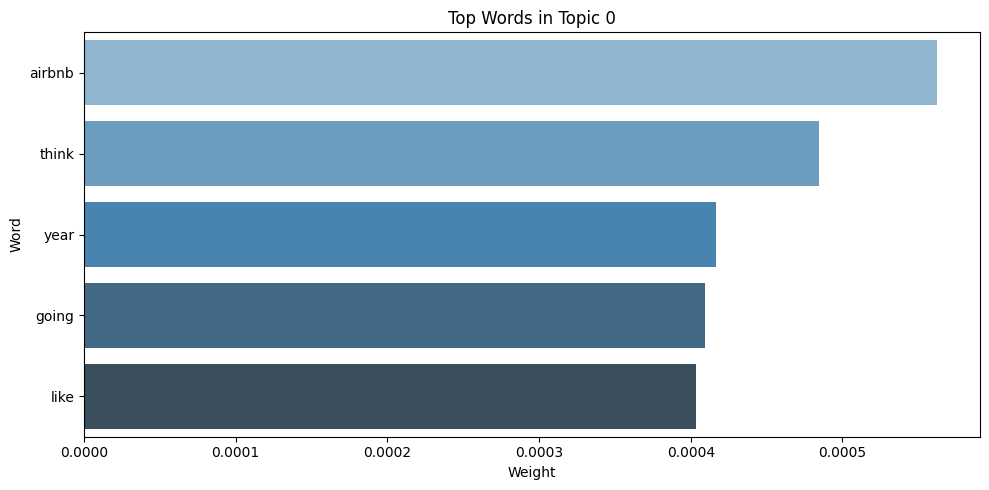

/tmp/ipykernel_7455/2400142843.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weights, y=words, palette='Blues_d', dodge=False)


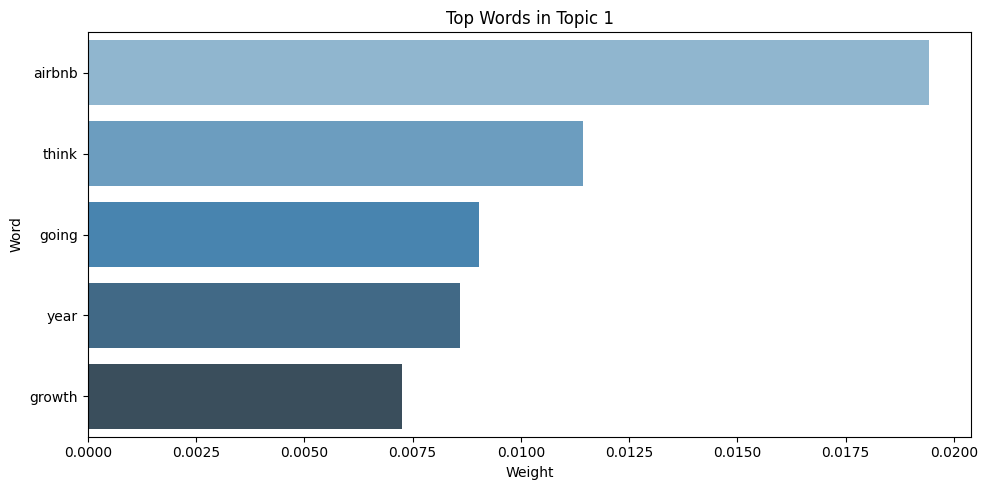

/tmp/ipykernel_7455/2400142843.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weights, y=words, palette='Blues_d', dodge=False)


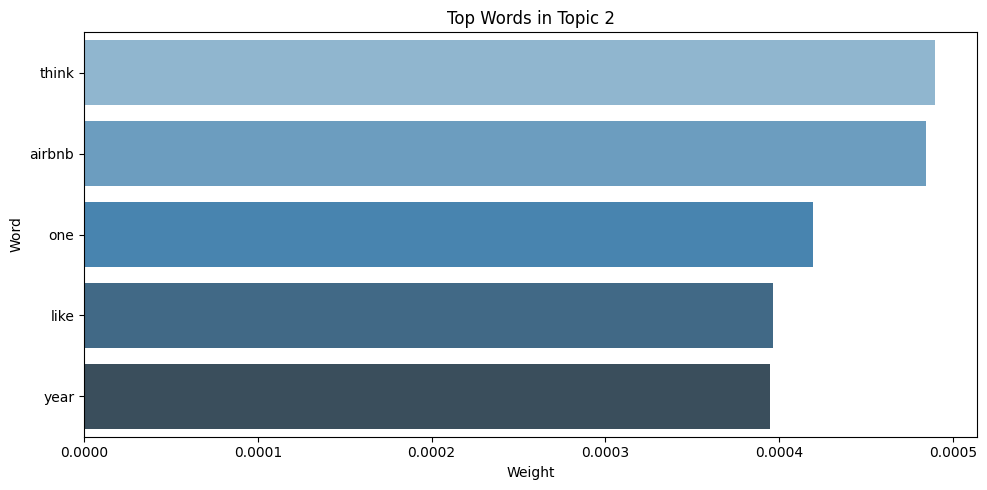

/tmp/ipykernel_7455/2400142843.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weights, y=words, palette='Blues_d', dodge=False)


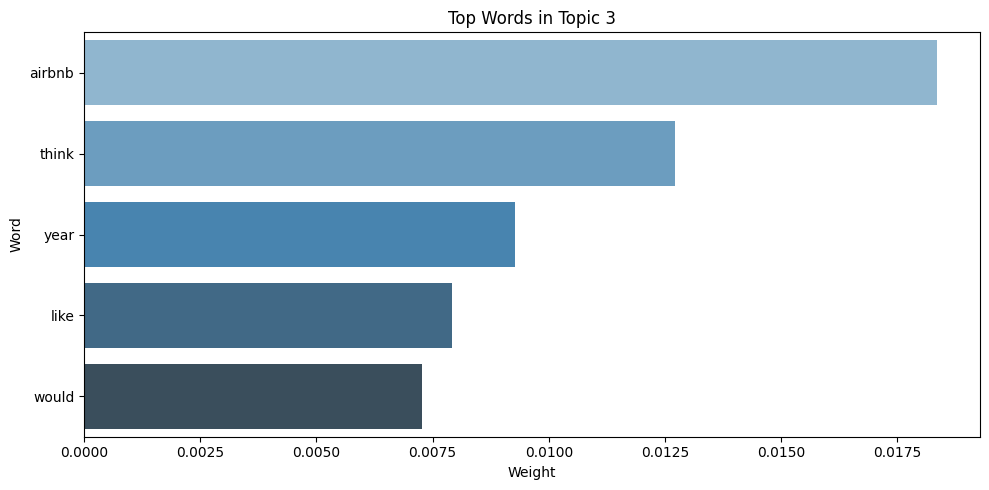

/tmp/ipykernel_7455/2400142843.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weights, y=words, palette='Blues_d', dodge=False)


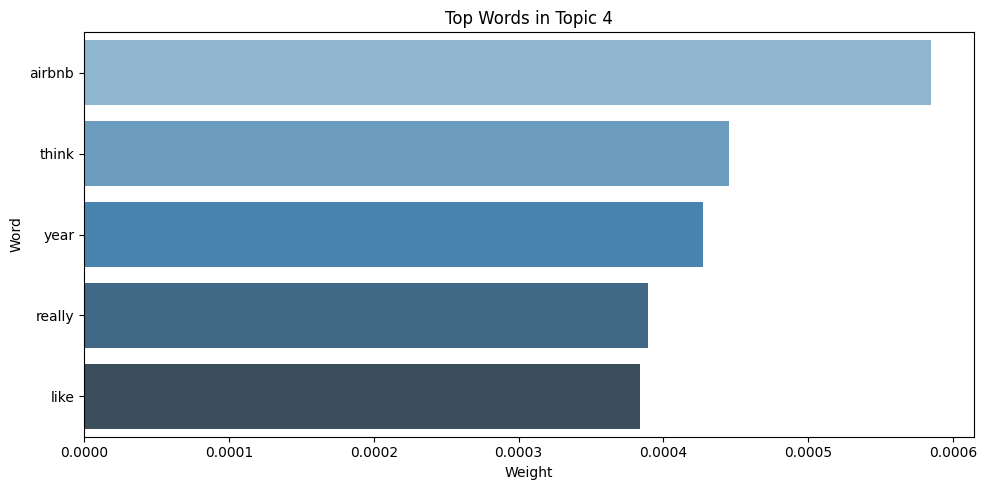

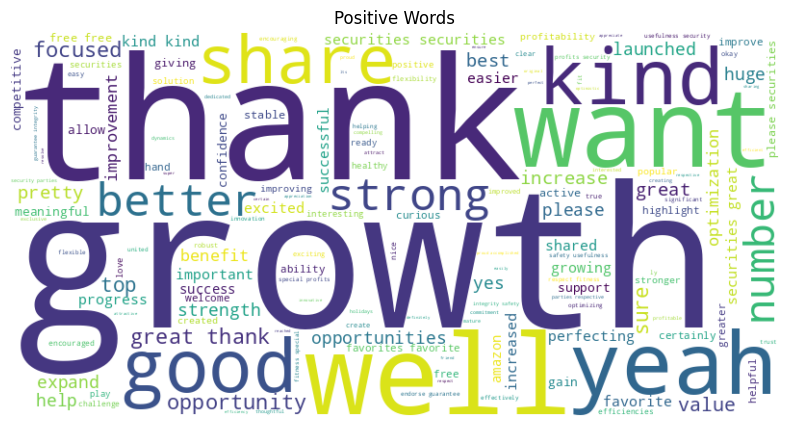

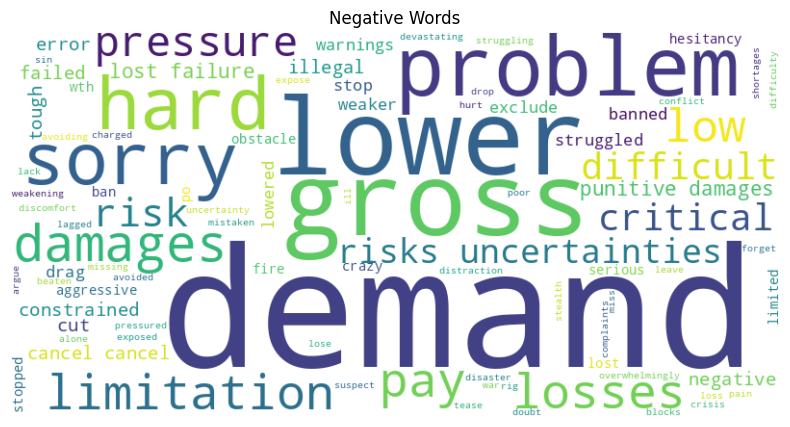

In [6]:
#textual and sentiment analysis of earnings call

def preprocess_text(text):
    """Preprocess the text for analysis."""
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and convert to lower case
    tokens = [word.lower() for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

def perform_topic_modeling(documents, num_topics=5):
    """Performs LDA topic modeling on the given list of documents."""
    # Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(documents)
    
    # Create a document-term matrix
    corpus = [dictionary.doc2bow(doc) for doc in documents]
    
    # Train LDA model
    lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    return lda_model, corpus, dictionary

def report_topics(lda_model, dictionary, num_words=5):
    """Reports the topics, their weights, and top words in each topic."""
    topics_info = []
    for topic_id in range(lda_model.num_topics):
        topic_terms = lda_model.get_topic_terms(topic_id, topn=num_words)
        # Convert term IDs to words and pair them with weights
        words_weights = [(dictionary[word_id], weight) for word_id, weight in topic_terms]
        topics_info.append((topic_id, words_weights))
    return topics_info

def analyze_sentiment(tokens):
    """Analyze sentiment of the tokens and return positive and negative words."""
    sia = SentimentIntensityAnalyzer()
    positive_words = []
    negative_words = []

    for word in tokens:
        sentiment_score = sia.polarity_scores(word)
        if sentiment_score['compound'] > 0.05:  # positive sentiment threshold
            positive_words.append(word)
        elif sentiment_score['compound'] < -0.05:  # negative sentiment threshold
            negative_words.append(word)

    return positive_words, negative_words

def plot_topics(lda_model, dictionary, num_words=5):
    """Plots the top words for each overall topic using actual weights."""
    for topic_id in range(lda_model.num_topics):
        topic_terms = lda_model.get_topic_terms(topic_id, topn=num_words)
        # Extract weights and corresponding words
        weights = [weight for (_, weight) in topic_terms]
        words = [dictionary[word_id] for (word_id, _) in topic_terms]

        if not weights or not words:
            print(f"Warning: No data found for Topic {topic_id}.")
            continue

        # Plot the topic's top words with their actual weights
        plt.figure(figsize=(10, 5))
        sns.barplot(x=weights, y=words, palette='Blues_d', dodge=False)
        plt.title(f'Top Words in Topic {topic_id}')
        plt.xlabel('Weight')
        plt.ylabel('Word')
        plt.tight_layout()
        plt.show()

def plot_document_topic_distribution(doc_topics, transcript_name):
    """Plots the topic distribution for a single transcript document."""
    topics = [topic_id for topic_id, weight in doc_topics]
    weights = [weight for topic_id, weight in doc_topics]
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=topics, y=weights, palette='Blues_d', dodge=False)
    plt.title(f"Topic Distribution for {transcript_name}")
    plt.xlabel("Topic")
    plt.ylabel("Weight")
    plt.tight_layout()
    plt.show()

def plot_wordcloud(words, title):
    """Plots a word cloud for the given words."""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

def main():
    # Path to the directory containing your earnings call PDF files
    pdf_directory = r"/home/speeep/Downloads/airbnb_earnings_calls"

    documents = []
    all_positive_words = []
    all_negative_words = []
    transcript_names = []  # To store filenames (transcript names) for per-document plots

    for filename in os.listdir(pdf_directory):
        if filename.lower().endswith(".pdf"):
            transcript_names.append(filename)
            pdf_file_path = os.path.join(pdf_directory, filename)
            
            # Extract text from PDF (assumes extract_text_from_pdf() is defined elsewhere)
            text = extract_text_from_pdf(pdf_file_path)

            # Preprocess and analyze the text
            tokens = preprocess_text(text)
            documents.append(tokens)

            # Print most common words for the current file
            freq_dist = FreqDist(tokens)
            print(f"\nMost common words in {filename}:")
            print(freq_dist.most_common(10))

            # Analyze sentiment and accumulate positive and negative words
            positive_words, negative_words = analyze_sentiment(tokens)
            all_positive_words.extend(positive_words)
            all_negative_words.extend(negative_words)

            print(f"Positive words in {filename}: {set(positive_words)}")
            print(f"Negative words in {filename}: {set(negative_words)}")

    # Perform topic modeling on all documents
    lda_model, corpus, dictionary = perform_topic_modeling(documents)

    # Report the overall topics and their weights
    print("\nTopics found by LDA:")
    topics_info = report_topics(lda_model, dictionary)
    for topic_id, words_weights in topics_info:
        topic_str = " + ".join([f"{weight:.3f}*\"{word}\"" for word, weight in words_weights])
        print(f"Topic {topic_id}: {topic_str}")

    # Plot the overall topics with correct, nonzero weights
    plot_topics(lda_model, dictionary)

    # Plot word clouds for aggregated positive and negative words
    plot_wordcloud(all_positive_words, 'Positive Words')
    plot_wordcloud(all_negative_words, 'Negative Words')

if __name__ == "__main__":
    main()


# Analyze Earnings Calls by Sections for Airbnb

In [7]:
#### analyze different sections of conference calls
import os
import PyPDF2
import nltk
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Download NLTK resources if you haven't done so
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')


Analysis for ABNB - Q2 2024 Earnings Call 6August2024 430 PM ET CORRECTED TRANSCRIPT - 06-Aug-24.pdf - Management Discussion Section:

Most common words in Management Discussion:
[('airbnb', 26), ('call', 13), ('growth', 9), ('year', 8), ('listings', 8), ('guests', 8), ('also', 7), ('nights', 7), ('booked', 7), ('supply', 7)]
Positive words in Management Discussion: {'easy', 'excitingly', 'excitement', 'success', 'focused', 'positive', 'proud', 'help', 'optimize', 'increase', 'progress', 'strong', 'perfecting', 'popular', 'highlight', 'thanks', 'favorite', 'better', 'shared', 'improved', 'improving', 'helping', 'special', 'top', 'benefits', 'best', 'strength', 'ly', 'guarantee', 'improve', 'shares', 'hand', 'share', 'favorites', 'expand', 'well', 'promote', 'holidays', 'increased', 'securities', 'ensuring', 'growing', 'free', 'welcome', 'like', 'thank', 'launched', 'anticipation', 'committed', 'good', 'huge', 'number', 'easier', 'active', 'please', 'ability', 'commitment', 'encouraged

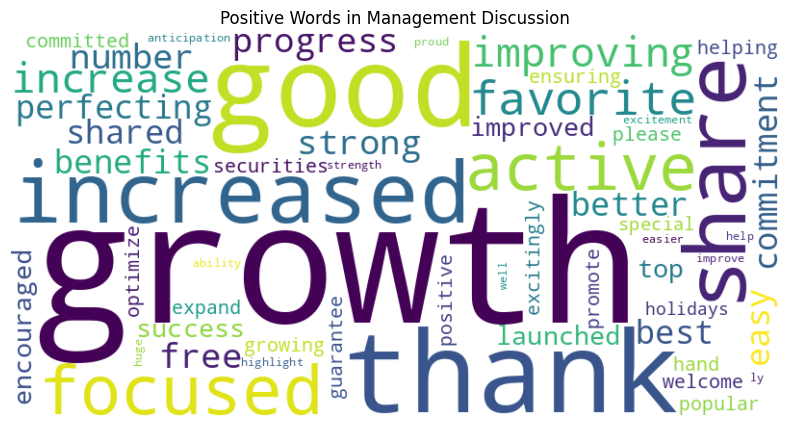


Negative Words Wordcloud:


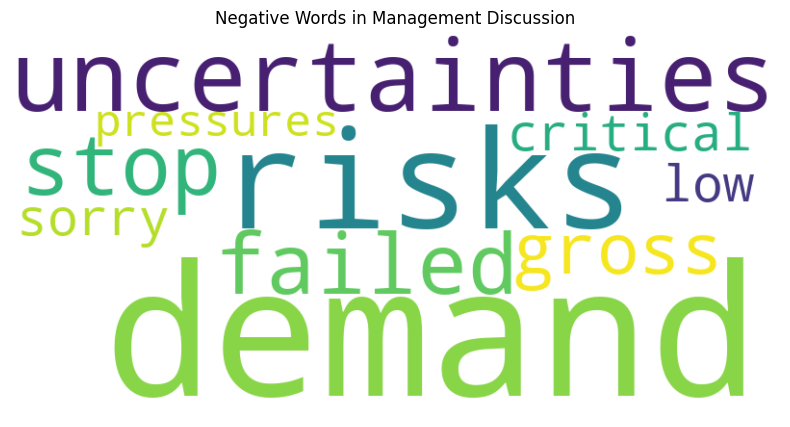


Topics found in Question and Answer:

Positive Words Wordcloud:


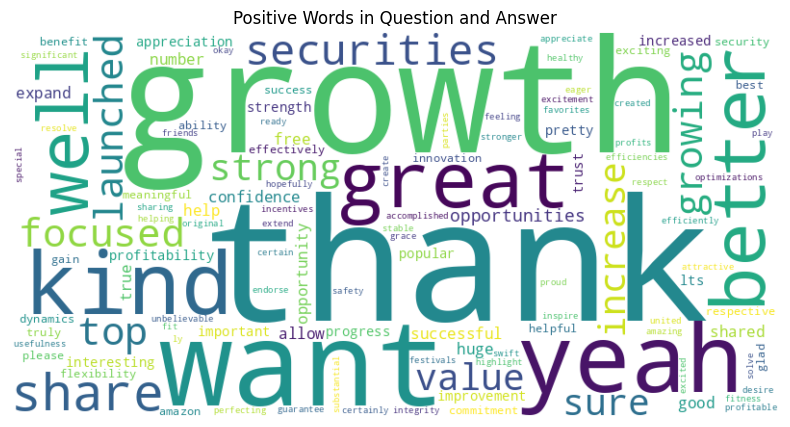


Negative Words Wordcloud:


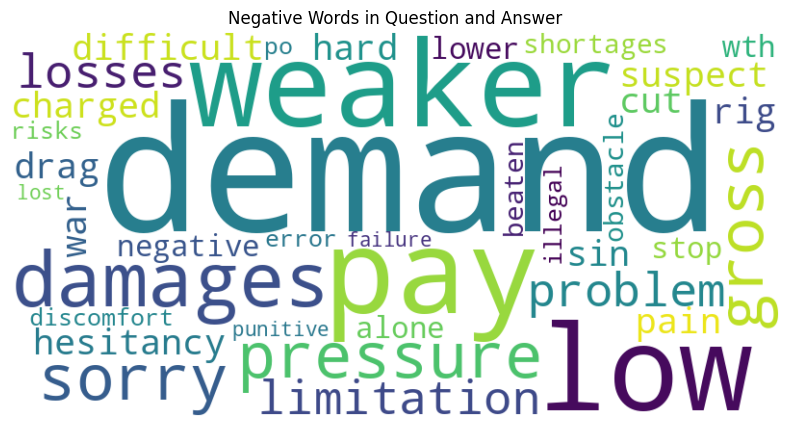


Analysis for ABNB - Q3 2024 Earnings Call 7November2024 430 PM ET CORRECTED TRANSCRIPT - 07-Nov-24.pdf - Management Discussion Section:

Most common words in Management Discussion:
[('airbnb', 24), ('call', 13), ('co', 13), ('quarter', 11), ('year', 11), ('also', 10), ('last', 10), ('guest', 10), ('guests', 9), ('make', 8)]
Positive words in Management Discussion: {'easy', 'positive', 'focused', 'excited', 'progress', 'strong', 'support', 'exciting', 'perfecting', 'popular', 'recommend', 'highlight', 'thanks', 'favorite', 'want', 'better', 'improving', 'shared', 'top', 'improved', 'pretty', 'best', 'guarantee', 'shares', 'recommended', 'hand', 'share', 'great', 'well', 'favorites', 'increased', 'securities', 'free', 'allow', 'welcome', 'like', 'attract', 'thank', 'launched', 'interest', 'huge', 'good', 'number', 'easier', 'fit', 'active', 'please', 'super', 'growth'}
Negative words in Management Discussion: {'uncertainties', 'failed', 'lower', 'low', 'risks', 'demand', 'pay'}
Average 

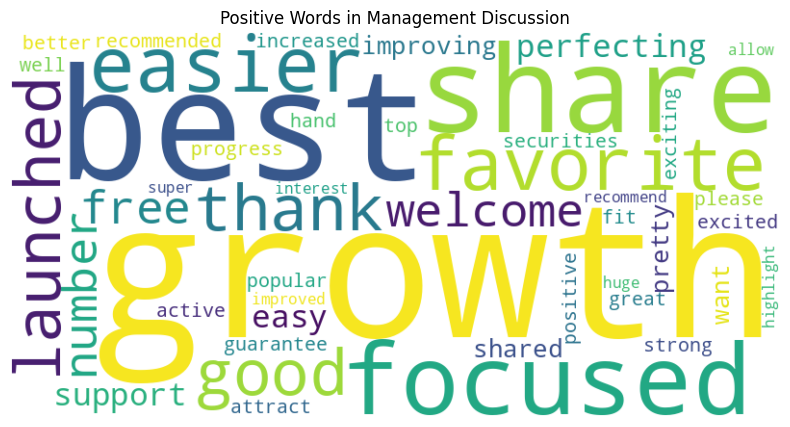


Negative Words Wordcloud:


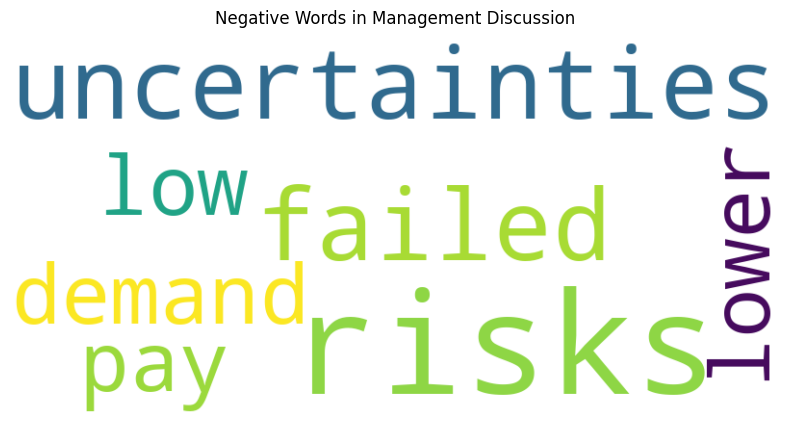


Topics found in Question and Answer:

Positive Words Wordcloud:


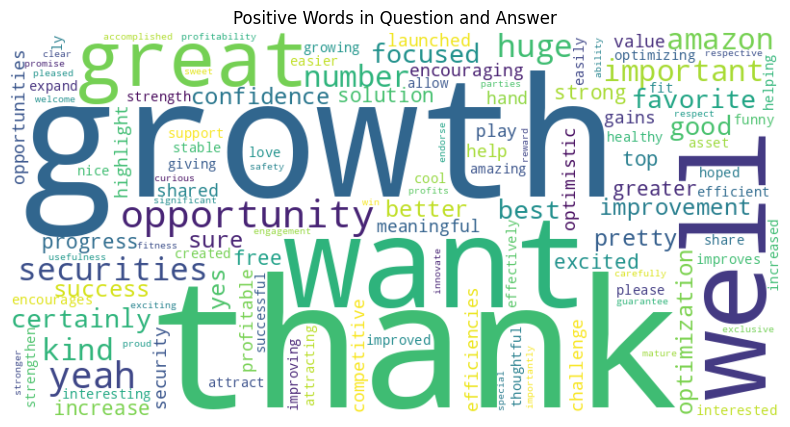


Negative Words Wordcloud:


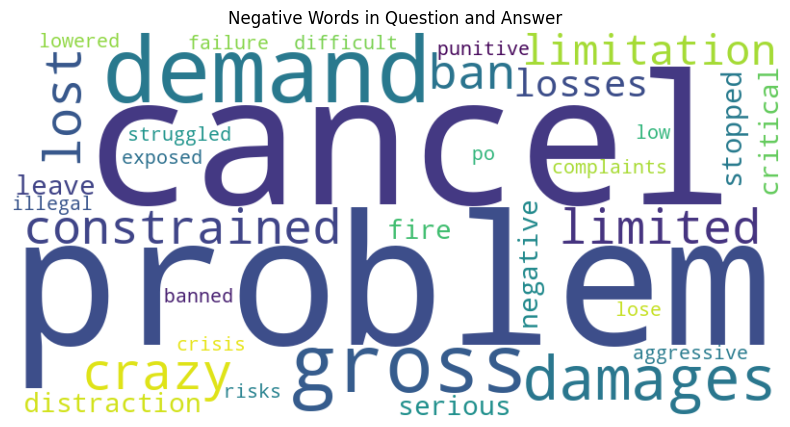


Analysis for ABNB - Q4 2024 Earnings Call 13February2025 430 PM ET CORRECTED TRANSCRIPT - 13-Feb-25.pdf - Management Discussion Section:

Most common words in Management Discussion:
[('airbnb', 18), ('year', 18), ('growth', 17), ('call', 14), ('new', 13), ('billion', 9), ('ebitda', 9), ('revenue', 8), ('adjusted', 8), ('also', 7)]
Positive words in Management Discussion: {'significant', 'strengthening', 'excited', 'focused', 'ready', 'profitability', 'giving', 'support', 'flexible', 'improvements', 'strong', 'unified', 'love', 'perfecting', 'innovate', 'optimizing', 'want', 'better', 'best', 'creating', 'optimizations', 'guarantee', 'sure', 'improve', 'hand', 'well', 'favorites', 'expand', 'share', 'perfect', 'securities', 'stable', 'free', 'welcome', 'like', 'thank', 'opportunities', 'good', 'number', 'easier', 'please', 'ability', 'growth', 'gain'}
Negative words in Management Discussion: {'uncertainties', 'hard', 'risks', 'exclude', 'demand'}
Average sentiment score for Management 

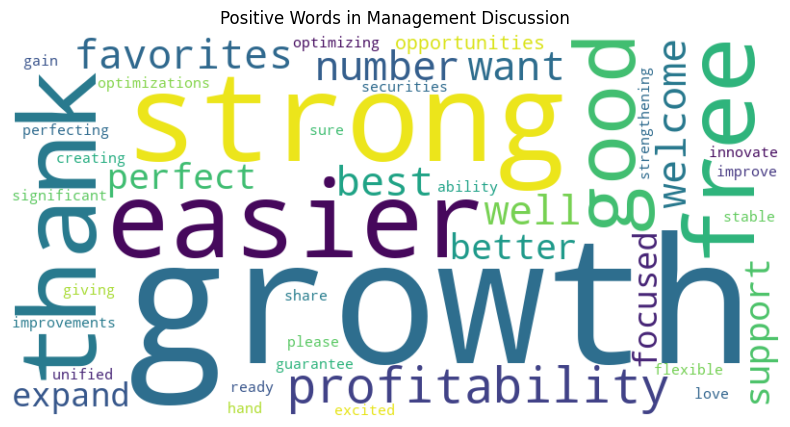


Negative Words Wordcloud:


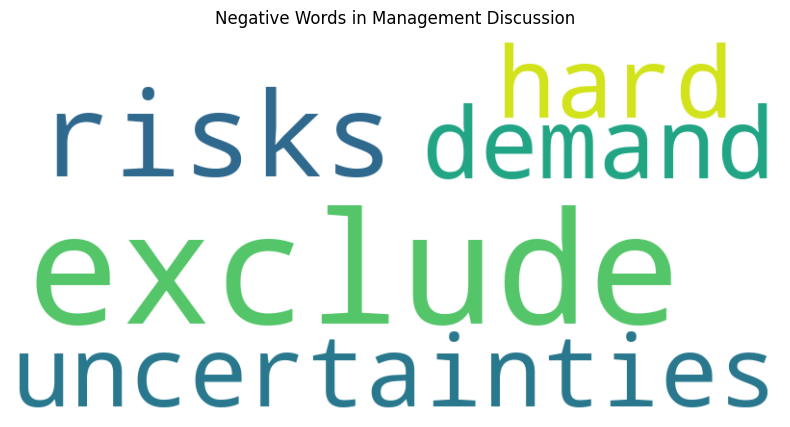


Topics found in Question and Answer:

Positive Words Wordcloud:


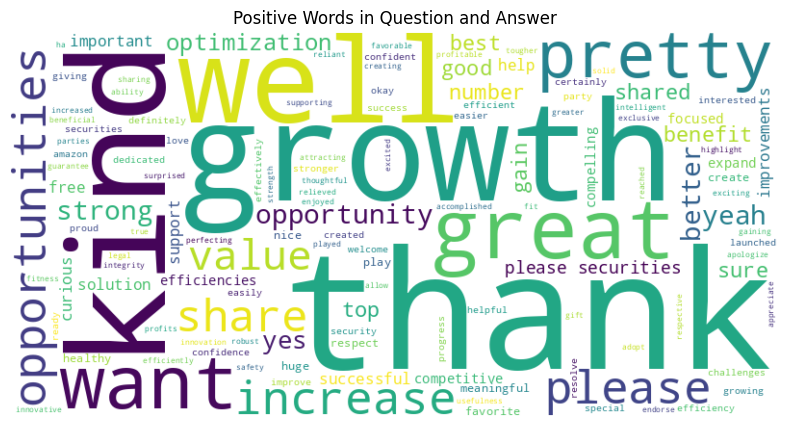


Negative Words Wordcloud:


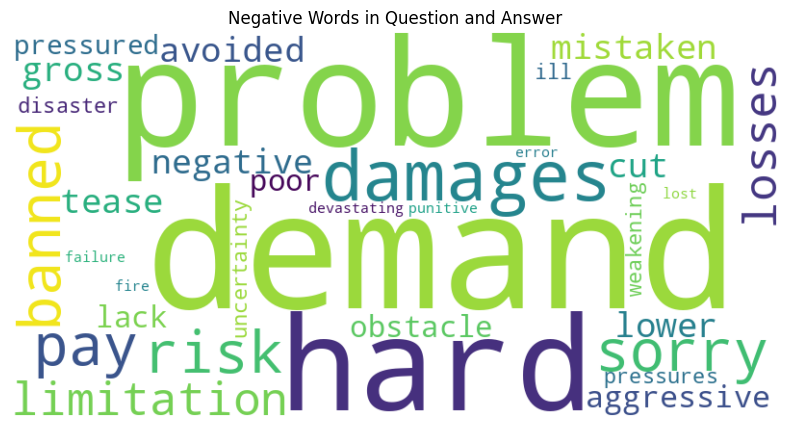


Analysis for ABNB - Q4 2023 Earnings Call 13February2024 430 PM ET CORRECTED TRANSCRIPT - 13-Feb-24.pdf - Management Discussion Section:

Most common words in Management Discussion:
[('airbnb', 26), ('call', 16), ('year', 15), ('core', 12), ('dave', 11), ('growth', 10), ('million', 9), ('business', 9), ('also', 8), ('new', 8)]
Positive words in Management Discussion: {'significant', 'excited', 'focused', 'positive', 'success', 'talent', 'ready', 'remarkable', 'impressive', 'strong', 'improvements', 'love', 'perfecting', 'popular', 'highlight', 'thanks', 'want', 'improving', 'better', 'gained', 'clear', 'thrilled', 'best', 'values', 'guarantee', 'dedicated', 'improve', 'meaningful', 'shares', 'great', 'hand', 'share', 'expand', 'well', 'encouraging', 'original', 'securities', 'exclusive', 'increased', 'innovative', 'growing', 'true', 'free', 'allow', 'welcome', 'like', 'attract', 'thank', 'launched', 'stronger', 'opportunities', 'good', 'yeah', 'number', 'active', 'please', 'approved',

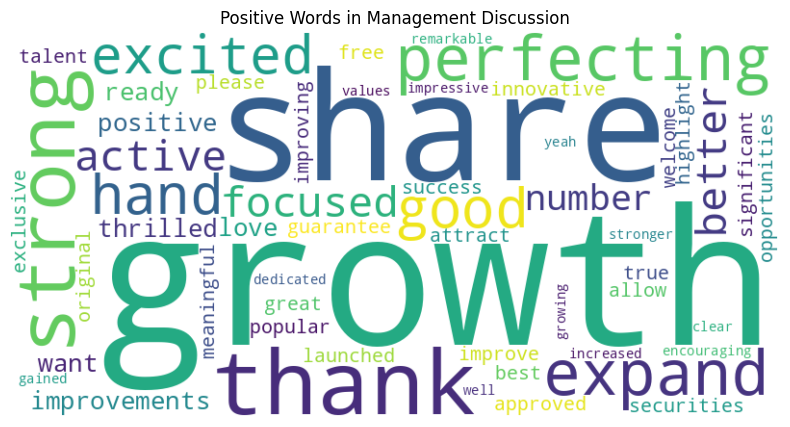


Negative Words Wordcloud:


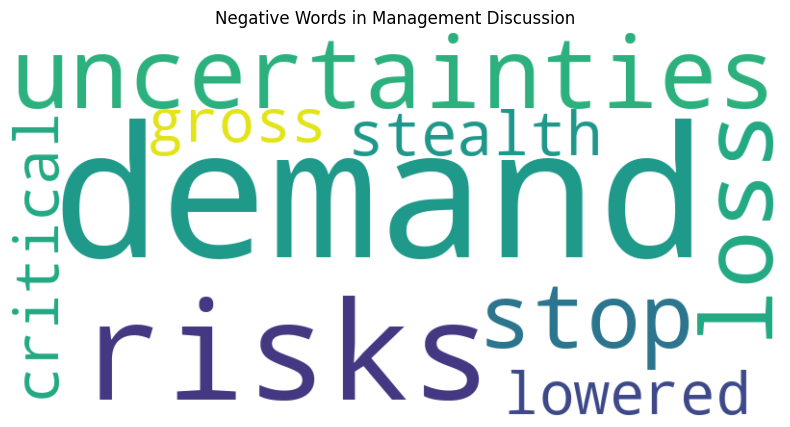


Topics found in Question and Answer:

Positive Words Wordcloud:


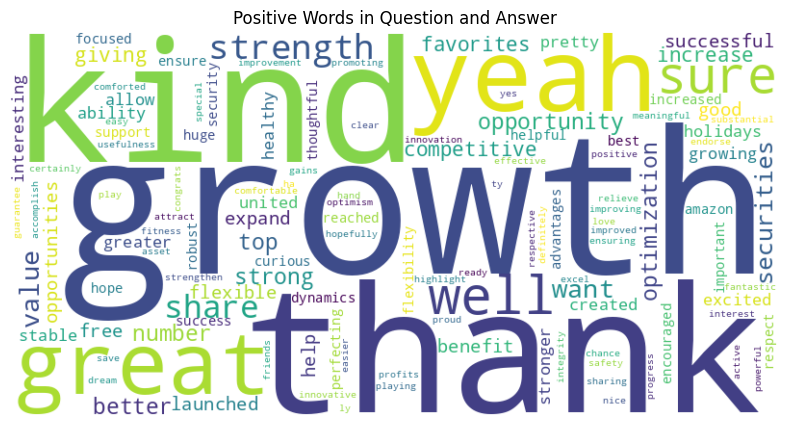


Negative Words Wordcloud:


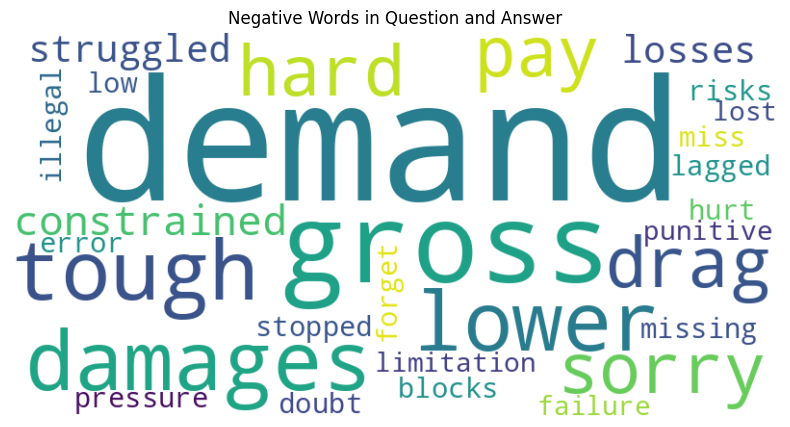


Analysis for ABNB - Q1 2024 Earnings Call 8May2024 430 PM ET CORRECTED TRANSCRIPT - 08-May-24.pdf - Management Discussion Section:

Most common words in Management Discussion:
[('airbnb', 25), ('year', 19), ('call', 14), ('icons', 11), ('nights', 9), ('first', 7), ('quarter', 7), ('also', 7), ('booked', 7), ('listings', 7)]
Positive words in Management Discussion: {'significant', 'ty', 'excited', 'focused', 'positive', 'important', 'proud', 'help', 'progress', 'strong', 'perfecting', 'popular', 'highlight', 'thanks', 'impressions', 'want', 'better', 'helping', 'top', 'clear', 'special', 'strength', 'benefits', 'guarantee', 'improve', 'shares', 'hand', 'favorites', 'greatest', 'share', 'fan', 'expand', 'increased', 'securities', 'exclusive', 'free', 'welcome', 'like', 'interestingly', 'thank', 'huge', 'good', 'mature', 'number', 'easier', 'active', 'please', 'ability', 'encouraged', 'growth'}
Negative words in Management Discussion: {'uncertainties', 'failed', 'hard', 'risks', 'critica

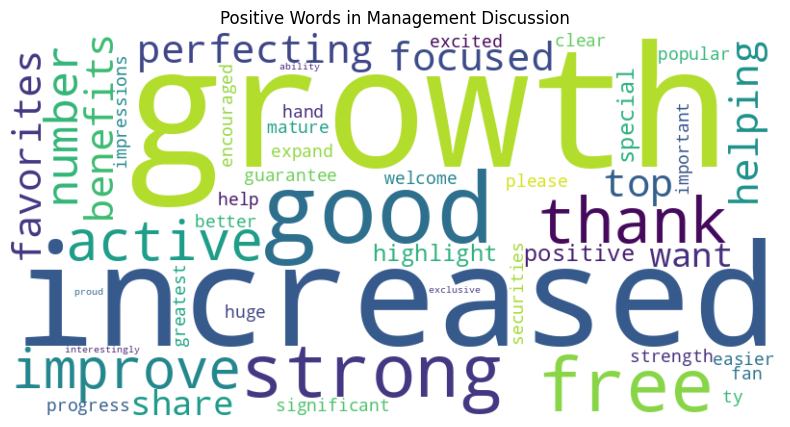


Negative Words Wordcloud:


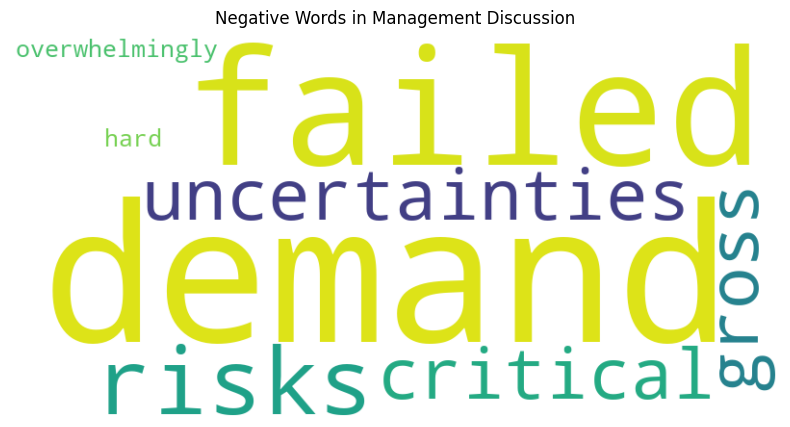


Topics found in Question and Answer:

Positive Words Wordcloud:


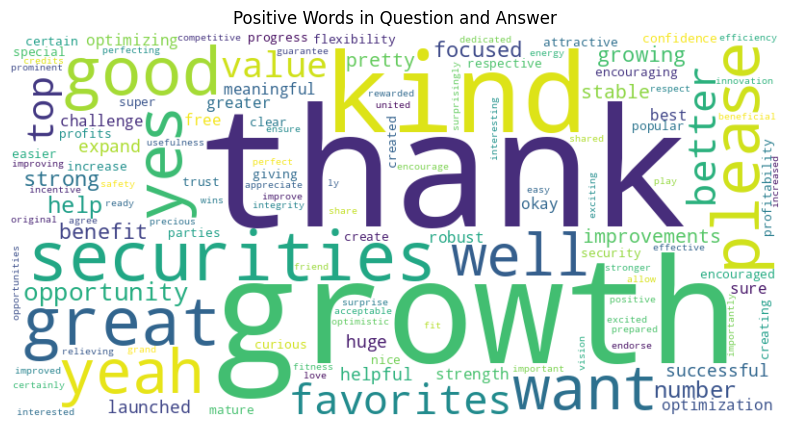


Negative Words Wordcloud:


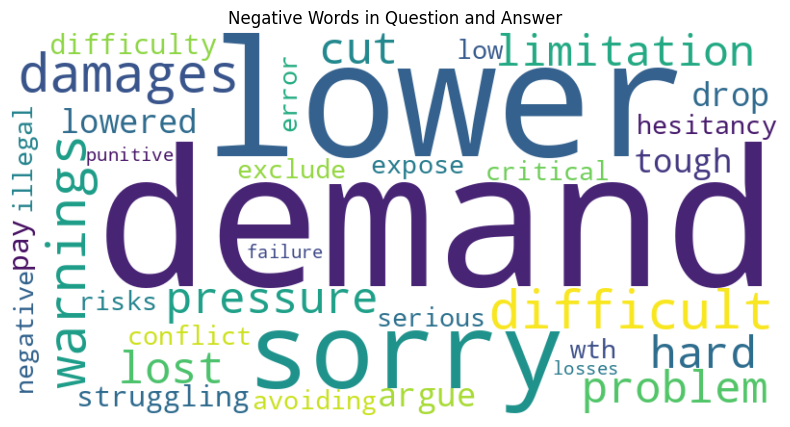

In [8]:
def extract_text_from_pdf(pdf_file_path):
    """Extracts text from a PDF file."""
    text = ""
    with open(pdf_file_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

def extract_sections(text):
    """Extracts Management Discussion and Q&A sections from the text."""
    management_discussion = ""
    question_answer = ""
    
    # Split the text into lines for processing
    lines = text.splitlines()
    in_management_discussion = False
    in_question_answer = False

    for line in lines:
        line = line.strip()
        if "MANAGEMENT DISCUSSION" in line.upper():
            in_management_discussion = True
            in_question_answer = False
            continue
        elif "QUESTION AND ANSWER" in line.upper():
            in_question_answer = True
            in_management_discussion = False
            continue
        
        if in_management_discussion:
            management_discussion += line + " "
        elif in_question_answer:
            question_answer += line + " "

    return management_discussion, question_answer

def preprocess_text(text):
    """Preprocess the text for analysis."""
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and convert to lower case
    tokens = [word.lower() for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

def perform_topic_modeling(documents, num_topics=5):
    """Performs LDA topic modeling on the given list of documents."""
    # Create a dictionary representation of the documents
    dictionary = corpora.Dictionary(documents)
    
    # Create a document-term matrix
    corpus = [dictionary.doc2bow(doc) for doc in documents]
    
    # Train LDA model
    lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    return lda_model, corpus, dictionary

def report_topics(lda_model, num_words=5):
    """Reports the topics, their weights, and top words in each topic."""
    topics_info = []
    for idx, topic in lda_model.print_topics(num_words=num_words):
        topics_info.append((idx, topic))
    return topics_info

def analyze_sentiment(tokens):
    """Analyze sentiment of the tokens and return positive and negative words and scores."""
    sia = SentimentIntensityAnalyzer()
    positive_words = []
    negative_words = []
    compound_scores = []

    for word in tokens:
        sentiment_score = sia.polarity_scores(word)
        compound_scores.append(sentiment_score['compound'])
        
        if sentiment_score['compound'] > 0.05:  # positive sentiment threshold
            positive_words.append(word)
        elif sentiment_score['compound'] < -0.05:  # negative sentiment threshold
            negative_words.append(word)

    avg_compound_score = sum(compound_scores) / len(compound_scores) if compound_scores else 0

    return positive_words, negative_words, avg_compound_score

def plot_topics(lda_model, num_words=5):
    """Plots the top words for each topic."""
    for idx, topic in lda_model.print_topics(num_words=num_words):
        words = [word.split('*')[1].strip('"') for word in topic.split(' + ')]
        weights = [float(word.split('*')[0]) for word in topic.split(' + ')]
        
        plt.figure(figsize=(10, 5))
        sns.barplot(x=weights, y=words)
        plt.title(f'Top words in Topic {idx}')
        plt.xlabel('Weight')
        plt.ylabel('Words')
        plt.show()

def plot_wordcloud(words, title):
    """Plots a word cloud for the given words."""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

def analyze_section(text, section_name):
    """Analyzes a specific section of the text."""
    tokens = preprocess_text(text)
    positive_words, negative_words, avg_score = analyze_sentiment(tokens)
    
    print(f"\nMost common words in {section_name}:")
    freq_dist = FreqDist(tokens)
    print(freq_dist.most_common(10))
    
    print(f"Positive words in {section_name}: {set(positive_words)}")
    print(f"Negative words in {section_name}: {set(negative_words)}")
    print(f"Average sentiment score for {section_name}: {avg_score:.4f}")
    
    return tokens, positive_words, negative_words, avg_score

def main():
    # Path to the directory containing your earnings call PDF files
    pdf_directory = r"/home/speeep/Downloads/airbnb_earnings_calls"

    for filename in os.listdir(pdf_directory):
        if filename.endswith(".pdf"):
            pdf_file_path = os.path.join(pdf_directory, filename)
            
            # Extract text from PDF
            text = extract_text_from_pdf(pdf_file_path)

            # Extract Management Discussion and Q&A sections
            management_discussion, question_answer = extract_sections(text)

            # Analyze Management Discussion section
            print(f"\nAnalysis for {filename} - Management Discussion Section:")
            md_tokens, md_positive_words, md_negative_words, md_avg_score = analyze_section(management_discussion, "Management Discussion")

            # Analyze Question and Answer section
            print(f"\nAnalysis for {filename} - Question and Answer Section:")
            qa_tokens, qa_positive_words, qa_negative_words, qa_avg_score = analyze_section(question_answer, "Question and Answer")

            # Perform topic modeling on both sections
            md_lda_model, md_corpus, md_dictionary = perform_topic_modeling([md_tokens])
            qa_lda_model, qa_corpus, qa_dictionary = perform_topic_modeling([qa_tokens])

            # Report the topics for both sections
            print("\nTopics found in Management Discussion:")
            report_topics(md_lda_model)
            # plot_topics(md_lda_model)

            # Plot word clouds for positive and negative words
            print("\nPositive Words Wordcloud:")
            plot_wordcloud(md_positive_words, 'Positive Words in Management Discussion')
            print("\nNegative Words Wordcloud:")
            plot_wordcloud(md_negative_words, 'Negative Words in Management Discussion')
            
            print("\nTopics found in Question and Answer:")
            report_topics(qa_lda_model)
            # plot_topics(qa_lda_model)

            # Plot word clouds for positive and negative words
            print("\nPositive Words Wordcloud:")
            plot_wordcloud(qa_positive_words, 'Positive Words in Question and Answer')
            print("\nNegative Words Wordcloud:")
            plot_wordcloud(qa_negative_words, 'Negative Words in Question and Answer')

if __name__ == "__main__":
    main()

# Financial-Specific Language Understanding? (FinBERT)

In [9]:
!pip install PyPDF2 transformers torch matplotlib nltk pandas

Defaulting to user installation because normal site-packages is not writeable


2025-04-13 12:57:41.700940: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-13 12:57:41.863713: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-13 12:57:41.884917: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-04-13 12:57:41.884934: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

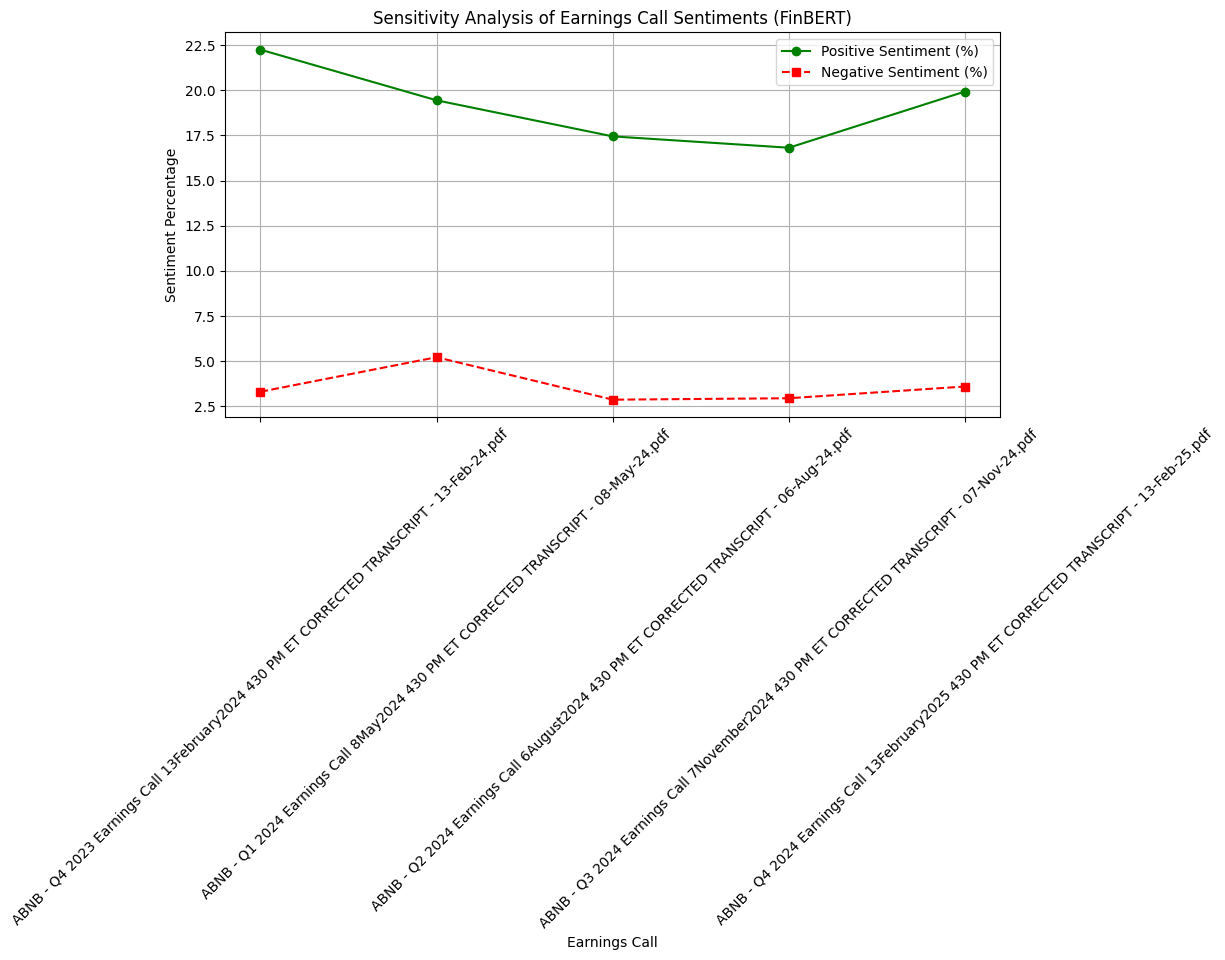

                                       Earnings Call  Positive  Neutral  \
0  ABNB - Q4 2023 Earnings Call 13February2024 43...       142      475   
1  ABNB - Q1 2024 Earnings Call 8May2024 430 PM E...       127      492   
2  ABNB - Q2 2024 Earnings Call 6August2024 430 P...       104      475   
3  ABNB - Q3 2024 Earnings Call 7November2024 430...       109      520   
4  ABNB - Q4 2024 Earnings Call 13February2025 43...       128      491   

   Negative  Total Sentences  Positive %  Negative %  
0        21              638   22.257053    3.291536  
1        34              653   19.448698    5.206738  
2        17              596   17.449664    2.852349  
3        19              648   16.820988    2.932099  
4        23              642   19.937695    3.582555  


In [10]:
import os
import re
import PyPDF2
import nltk
from nltk.tokenize import sent_tokenize
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, pipeline

# Download NLTK tokenizer (if not already installed)
# nltk.download("punkt")

# Load FinBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

# Folder containing earnings call PDFs
folder_path = r"/home/speeep/Downloads/airbnb_earnings_calls"

# Helper function to extract (year, quarter) from filename (e.g., "Q4 2023")
def extract_quarter_year(filename):
    match = re.search(r'Q([1-4]).*?(\d{4})', filename.upper())
    if match:
        quarter = int(match.group(1))
        year = int(match.group(2))
        return (year, quarter)
    else:
        return (9999, 0)  # Files without a match are sorted at the end

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as pdf_file:
        reader = PyPDF2.PdfReader(pdf_file)
        for page in reader.pages:
            text += page.extract_text() + "\n"
    return text

# Function to process sentences safely (truncate if >512 tokens)
def analyze_text_with_truncation(text):
    tokenized_text = tokenizer.encode(text, truncation=True, max_length=512, return_tensors="pt")
    sentiment = sentiment_pipeline(text[:512])[0]  # Only send 512 chars to avoid token mismatch
    return sentiment

# Process each PDF in the folder (sorted by quarter/year)
sentiment_results = []
for filename in sorted(os.listdir(folder_path), key=extract_quarter_year):
    if filename.endswith(".pdf"):
        file_path = os.path.join(folder_path, filename)
        
        # Extract text from PDF
        transcript_text = extract_text_from_pdf(file_path)
        sentences = sent_tokenize(transcript_text)

        # Run sentiment analysis with truncation
        sentiments = [analyze_text_with_truncation(sentence) for sentence in sentences]

        # Count sentiment distribution
        sentiment_counts = {
            "positive": sum(1 for s in sentiments if s["label"] == "positive"),
            "neutral": sum(1 for s in sentiments if s["label"] == "neutral"),
            "negative": sum(1 for s in sentiments if s["label"] == "negative")
        }
        
        # Store results
        sentiment_results.append({
            "Earnings Call": filename,
            "Positive": sentiment_counts["positive"],
            "Neutral": sentiment_counts["neutral"],
            "Negative": sentiment_counts["negative"],
            "Total Sentences": len(sentiments),
            "Positive %": sentiment_counts["positive"] / len(sentiments) * 100,
            "Negative %": sentiment_counts["negative"] / len(sentiments) * 100
        })

# Convert results to DataFrame
df_results = pd.DataFrame(sentiment_results)

# 🎨 Plot sensitivity analysis (Positive vs. Negative %)
plt.figure(figsize=(10, 5))
plt.plot(df_results["Earnings Call"], df_results["Positive %"], marker="o", linestyle="-", label="Positive Sentiment (%)", color="green")
plt.plot(df_results["Earnings Call"], df_results["Negative %"], marker="s", linestyle="--", label="Negative Sentiment (%)", color="red")
plt.xlabel("Earnings Call")
plt.ylabel("Sentiment Percentage")
plt.title("Sensitivity Analysis of Earnings Call Sentiments (FinBERT)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# 📊 Print summarized sensitivity results
print(df_results)


# Airbnb Stock Performance after earning calls

In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
import re

# -- 1. Retrieve just the 'Close' column from yfinance as a single-level DataFrame
df_stock = yf.download("ABNB", start="2024-01-01", end="2025-03-01")[['Close']].dropna()

# Calculate daily returns and annualized volatility on this single-level DataFrame
df_stock['Returns'] = df_stock['Close'].pct_change()
df_stock['Volatility'] = df_stock['Returns'].rolling(window=252).std() * np.sqrt(252)

# -- 2. Recompute stock movement for your earnings call dates --
input_dates = ['2024-02-13', '2024-05-08', '2024-08-06', '2024-11-07', '2025-02-13']
stock_movement = []
for date_str in input_dates:
    date = pd.to_datetime(date_str)
    try:
        date_idx = df_stock.index.get_loc(date)
        
        # Force close_price to be a scalar
        close_price = df_stock.loc[date, 'Close']
        if isinstance(close_price, pd.Series):
            close_price = close_price.iloc[0]
        
        row = {'Date': date.strftime('%Y-%m-%d'), 'Close Price': close_price}
        
        # Calculate returns for offsets: 1D=1 row, 3D=3 rows, 5D=5 rows, 1W=7 rows.
        for label, offset in [('1D', 1), ('3D', 3), ('5D', 5), ('1W', 7)]:
            if (date_idx + offset) < len(df_stock):
                future_close = df_stock['Close'].iloc[date_idx + offset]
                if isinstance(future_close, pd.Series):
                    future_close = future_close.iloc[0]
                row[f'{label} Return'] = (future_close - close_price) / close_price
            else:
                row[f'{label} Return'] = np.nan
        
        stock_movement.append(row)
    
    except Exception as e:
        print(f"Error processing date {date_str}: {e}")

movement_df = pd.DataFrame(stock_movement)

# -- 3. Map each date to a Quarter label for merging --
quarter_map = {
    '2024-02-13': 'Q4 2023',
    '2024-05-08': 'Q1 2024',
    '2024-08-06': 'Q2 2024',
    '2024-11-07': 'Q3 2024',
    '2025-02-13': 'Q4 2024'
}
movement_df['Quarter'] = movement_df['Date'].map(quarter_map)

# -- 4. Use your existing sentiment DataFrame (df_results) and add a 'Quarter' column --
def extract_quarter_from_filename(filename):
    match = re.search(r'(Q[1-4]\s*\d{4})', filename.upper())
    return match.group(1).strip() if match else None

df_results['Quarter'] = df_results['Earnings Call'].apply(extract_quarter_from_filename)

# -- 5. Merge the sentiment and stock movement DataFrames on 'Quarter' --
merged_df = pd.merge(df_results, movement_df, on='Quarter', how='inner').reset_index(drop=True)

# Compute the Positive/Negative ratio.
merged_df['Pos/Neg Ratio'] = merged_df.apply(lambda row: row['Positive'] / row['Negative']
                                               if row['Negative'] > 0 else np.nan, axis=1)

# Select and order desired columns.
final_df = merged_df[['Quarter', 'Positive', 'Negative', 'Pos/Neg Ratio',
                        '1D Return', '3D Return', '5D Return', '1W Return']]

# -- 6. Sort the final DataFrame so that Q4 2023 is first.
def sort_quarter(q):
    # Extract quarter number and year from a string like "Q4 2023"
    m = re.search(r'Q([1-4])\s*(\d{4})', q)
    if m:
        quarter = int(m.group(1))
        year = int(m.group(2))
        return (year, quarter)
    else:
        return (9999, 0)

# Apply the custom key to the Quarter column.
final_df = final_df.sort_values(by='Quarter', key=lambda col: col.apply(sort_quarter)).reset_index(drop=True)

# -- 7. Convert return columns to percentage strings
for col in ['1D Return', '3D Return', '5D Return', '1W Return']:
    final_df[col] = final_df[col].apply(lambda x: f"{x*100:.2f}%" if pd.notnull(x) else "")

# Display only the final merged table.
display(final_df)


[*********************100%***********************]  1 of 1 completed

Quarter  Positive  Negative  Pos/Neg Ratio 1D Return 3D Return 5D Return  \
0  Q4 2023       142        21       6.761905    -1.74%     1.12%    -1.05%   
1  Q1 2024       127        34       3.735294    -6.87%    -5.55%    -7.66%   
2  Q2 2024       104        17       6.117647   -13.38%   -11.80%   -10.40%   
3  Q3 2024       109        19       5.736842    -8.66%    -9.62%    -8.69%   
4  Q4 2024       128        23       5.565217    14.45%    12.01%     3.57%   

  1W Return  
0     1.22%  
1    -7.75%  
2    -8.88%  
3   -10.30%  
4     0.36%